# Minicurso: Matemática com Python


## Parte 2 do segundo encontro: 
 

Conteúdos:


[1.Nosso objetivo.](#sec1)


[2. Configurações iniciais.](#sec2)


[3. Polígonos como `patches`.](#sec3)


[4. Matrizes de rotação 2D.](#sec4)


[5. Contração de um quadrado.](#sec5)


[6.Referências.](#sec6)

<div id="sec1"></div> 

## 1. Nosso objetivo.

<img src="imagens/ilusao_otica.svg" alt="Drawing" style="width: 500px;"/>

A imagem acima foi criada usando ferramentas de Python. Neste encontro resolveremos várias tarefas que nos permitirão construir o código que foi usado para criar essa imagem.

<div id="sec2"></div> 

## 2. Configurações iniciais.

In [1]:
#Importamos as bibliotecas que usaremos.
import numpy as np
import matplotlib.pyplot as plt

<div id="sec3"></div> 

## 3. Polígonos como `patches`.

Há várias maneiras de plotar quadrados usando a biblioteca Matplotlib. 

Podemos usar, por exemplo, a função `Polygon`, do módulo *matplotlib.patches * que utiliza como argumentos, entre outros, 

+ xy: array de dimensões (N, 2), onde N é a quantidade de pontos.
    
+ color: Cor

+ edgecolor ou ec: Cor da borda

+ facecolor ou fc: Cor do interior.

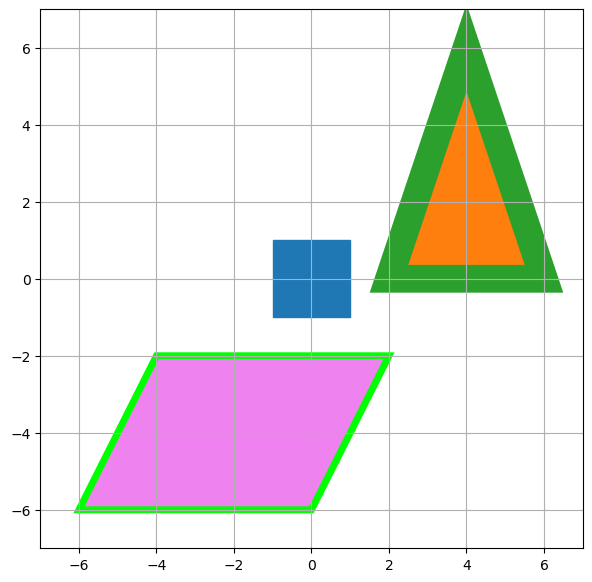

In [2]:
#Importamos o módulo que contêm os "patches"
import matplotlib.patches as mpatches

figsize = (7, 7)
colunas = 1
linhas = 1
#Criar os objetos fig e ax
fig, ax = plt.subplots(linhas, colunas, figsize=figsize)

#Quadrado unindo os pontos (-1,-1), (-1,1), (1,1) e (1,-1).
vertices_q = np.array([[-1,-1, 1, 1], [-1, 1, 1, -1]])
quadrado = mpatches.Polygon(vertices_q.T, color = 'tab:blue')
ax.add_patch(quadrado)

#Triângulo unindo os pontos (2,0), (4,6) e (6,0).
vertices_t = np.array([[2, 4, 6], [0, 6, 0]])    
triangulo = mpatches.Polygon(vertices_t.T, fc = 'tab:orange', ec = 'tab:green', lw = 20)
ax.add_patch(triangulo)

#Paralelogramo unindo os pontos (-6,-6), (-4,-2), (2,-2)  e (0,-6).
vertices_p = np.array([[-6, -4, 2, 0], [-6, -2, -2, -6]])    
paralelogramo = mpatches.Polygon(vertices_p.T, fc = 'violet', ec = 'lime', lw = 5)
ax.add_patch(paralelogramo)

#Mais configurações
#ax.axis('square')
ax.axis([-7,7,-7,7])
ax.grid()
#ax.axis('off')
   
plt.show()

<div id="sec4"></div> 

## 4. Matrizes de rotação 2D.

Suponha que o ponto de coordenadas $(x', y')$ é obtido rotacionando o ponto de coordenadas $(x,y)$, no sentido anti-horário, como mostra a figura abaixo.

<img src="imagens/explic_rot.png" alt="Drawing" style="width: 550px;"/>

Como $(x,y)$ forma um ângulo $\beta$ com o eixo horizontal temos que $x = r \cos \beta$ e $y = r \text{ sen } \beta$. Além disso, $(x',y')$ forma um ângulo $\alpha + \beta$ com o eixo horizontal, portanto,

$\begin{align*}
x' & = r \cos (\alpha + \beta)  = r \cos \alpha \cos \beta - r \text{ sen } \alpha \text{ sen } \beta= (r \cos \beta) \cos \alpha  - (r \text{ sen } \beta) \text{ sen } \alpha = x \cos \alpha - y\text{ sen } \alpha\\
y' & = r \text{ sen } (\alpha + \beta)  = r \text{ sen } \alpha \cos \beta + r \cos \alpha \text{ sen } \beta= (r \cos \beta) \text{ sen } \alpha  + (r \text{ sen } \beta) \cos \alpha = x \text{ sen } \alpha + y  \cos \alpha.
\end{align*}$

Assim, obtemos que
$$\begin{bmatrix} x'\\y'\end{bmatrix} = \begin{bmatrix} \cos \alpha & - \text{ sen } \alpha \\\text{ sen } \alpha & \cos \alpha\end{bmatrix}\begin{bmatrix} x\\y\end{bmatrix}.$$

A matriz $$R_{_\alpha} = \begin{bmatrix} \cos \alpha & - \text{ sen } \alpha \\\text{ sen } \alpha & \cos \alpha\end{bmatrix}.$$

é chamada de **matriz de rotação** no plano.

Em Python, podemos definir esta matriz como uma função do ângulo de rotação.

In [3]:
#Matriz de rotação
def R(angulo):
    return np.array([[np.cos(angulo), -np.sin(angulo)],
             [np.sin(angulo), np.cos(angulo)]])

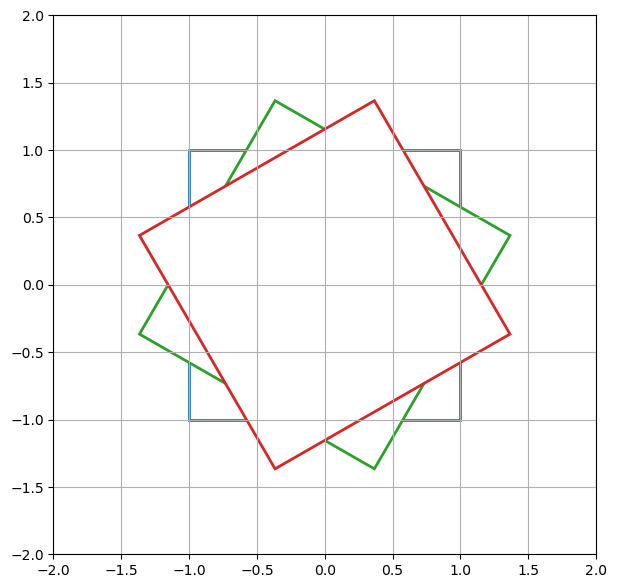

In [4]:
import matplotlib.patches as mpatches

figsize = (7, 7)
colunas = 1
linhas = 1
#Criar os objetos fig e ax
fig, ax = plt.subplots(linhas, colunas, figsize=figsize)

#Quadrado unindo os pontos (-1,-1), (-1,1), (1,1) e (1,-1).
vertices_q = np.array([[-1,-1, 1, 1], [-1, 1, 1, -1]])
quadrado = mpatches.Polygon(vertices_q.T, fc = 'white', ec = 'tab:blue', lw = 2)
ax.add_patch(quadrado)

#Quadrado rotacionado alpha = pi/3.
vertices_q1 = R(np.pi/3)@vertices_q    
quadrado1 = mpatches.Polygon(vertices_q1.T, fc = 'white', ec = 'tab:green', lw = 2)
ax.add_patch(quadrado1)

#Quadrado rotacionado alpha = 2pi/3.
vertices_q2 = R(2*np.pi/3)@vertices_q    
quadrado2 = mpatches.Polygon(vertices_q2.T, fc = 'white', ec = 'tab:red', lw = 2)
ax.add_patch(quadrado2)

#Mais configurações
#ax.axis('square')
ax.axis([-2,2,-2,2])
ax.grid()
#ax.axis('off')
   
plt.show()

<div id="sec5"></div> 

## 5. Contração de um quadrado.

Se multiplicarmos as coordenadas dos quatro vértices de um quadrado por um fator de módulo menor do que $1$, obteremos quadrados contraídos.

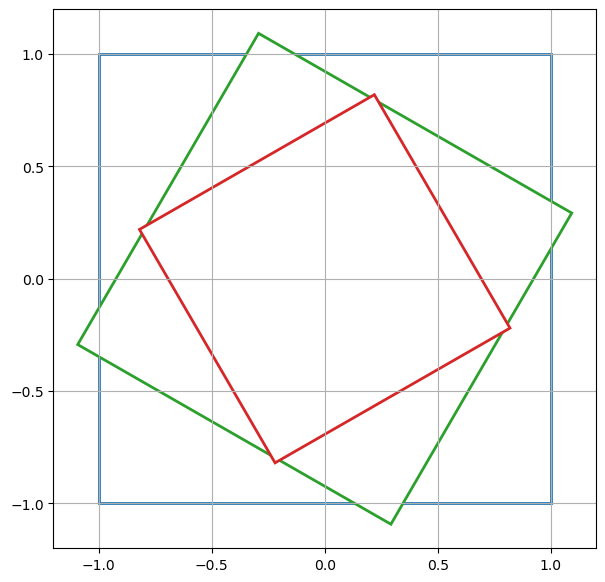

In [5]:
import matplotlib.patches as mpatches

figsize = (7, 7)
colunas = 1
linhas = 1
#Criar os objetos fig e ax
fig, ax = plt.subplots(linhas, colunas, figsize=figsize)

#Quadrado unindo os pontos (-1,-1), (-1,1), (1,1) e (1,-1).
vertices_q = np.array([[-1,-1, 1, 1], [-1, 1, 1, -1]])
quadrado = mpatches.Polygon(vertices_q.T, fc = 'white', ec = 'tab:blue', lw = 2)
ax.add_patch(quadrado)

#Quadrado rotacionado alpha = pi/3 e contraído usando fator1.
fator1 = 0.8
vertices_q1 = fator1*R(np.pi/3)@vertices_q    
quadrado1 = mpatches.Polygon(vertices_q1.T, fc = 'white', ec = 'tab:green', lw = 2)
ax.add_patch(quadrado1)

#Quadrado rotacionado alpha = 2pi/3 e contraído usando fator2.
fator2 = 0.6
vertices_q2 = fator2*R(2*np.pi/3)@vertices_q    
quadrado2 = mpatches.Polygon(vertices_q2.T, fc = 'white', ec = 'tab:red', lw = 2)
ax.add_patch(quadrado2)

#Mais configurações
#ax.axis('square')
ax.axis([-1.2,1.2,-1.2,1.2])
ax.grid()
#ax.axis('off')
   
plt.show()

Resta apenas entender qual é o fator que garante que o vértice do quadrado contraído está sobre o lado do quadrado anterior.

A figura abaixo nos dá a resposta.

<img src="imagens/explic_fator.png" alt="Drawing" style="width: 550px;"/>

Portanto, 

$$k = \frac{1}{\cos(\alpha) + \text{ sen}(\alpha)}.$$

E é isso! Agora você vai entender com certeza como foi feita a figura!!

<div id="sec6"></div> 

## 6. Referências.

+ https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.RegularPolygon.html#matplotlib.patches.RegularPolygon

+ [Matriz de rotaçao na Wikipedia](https://pt.wikipedia.org/wiki/Matriz_de_rota%C3%A7%C3%A3o).